# Chapter 2 Exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import arviz as az
import pymc3 as pm
np.random.seed(123)

# Exercise 6
***

Text(0, 0.5, 'y')

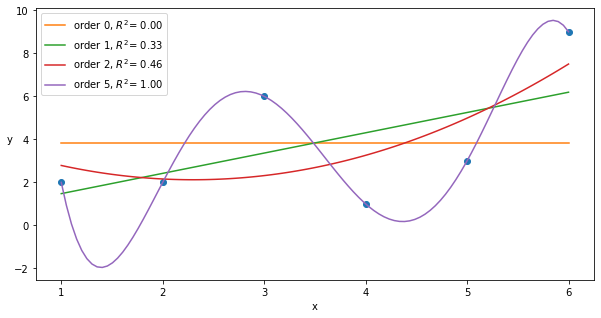

In [2]:
x = np.arange(1,7)
y = np.random.randint(0, 10, size = 6)

plt.figure(figsize=(10, 5))
order = [0, 1, 2, 5]
plt.plot(x, y, 'o')
for i in order:
    x_n = np.linspace(x.min(), x.max(), 100)
    coeffs = np.polyfit(x, y, deg=i)
    ffit = np.polyval(coeffs, x_n)

    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.mean(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    r2 = ssreg / sstot

    plt.plot(x_n, ffit, label=f'order {i}, $R^2$= {r2:.2f}')

plt.legend(loc=2)
plt.xlabel('x')
plt.ylabel('y', rotation=0)


As expected when we have a low order polynomial our model doesn't fit hte data well, with zero order polynomial we just predict the same value no matter what. With a high order polynomial the fit looks great, but this is only for data we have seen. Typically when a new data point is introduced the model will not do a good job. Additionally if there is noise in the data, the model will think the noise is meaningful, when in reality it's a mistake and means nothing.

# Exercise 8

In [3]:
# Generate coin flips
coins = 30 
heads = 15
y_d = np.repeat([0, 1], [coins-heads, heads])

Per the advice in the chapter we will compute Bayes Factor using the SMC method

In [4]:
with pm.Model() as model_BF_0:
    θ = pm.Beta('θ', 1, 1)
    y = pm.Bernoulli('y', θ, observed=y_d)
    trace_BF_0 = pm.sample(2500, step=pm.SMC())

with pm.Model() as model_BF_1:
    θ = pm.Beta('θ', .5, .5)
    y = pm.Bernoulli('y', θ, observed=y_d)
    trace_BF_1 = pm.sample(2500, step=pm.SMC())

Sample initial stage: ...
Stage: 0 Beta: 0.334961 Steps: 25
100%|██████████| 2500/2500 [00:03<00:00, 788.98it/s]
Stage: 1 Beta: 1.000000 Steps: 4
100%|██████████| 2500/2500 [00:01<00:00, 1936.67it/s]
Sample initial stage: ...
Stage: 0 Beta: 0.146484 Steps: 25
100%|██████████| 2500/2500 [00:03<00:00, 700.04it/s]
Stage: 1 Beta: 1.000000 Steps: 4
100%|██████████| 2500/2500 [00:00<00:00, 3462.81it/s]


In [5]:
model_BF_0.marginal_likelihood / model_BF_1.marginal_likelihood

1.5466473984070264

Referencing back to Figure 1.4, we can see that a $Beta(1,1)$ prior is flat, meaning all values are equally likely, but a prior $Beta(.5,.5)$ has larger values near 0 and 1. Intuitively it doesn't make much sense that our coin will be very biased heads, or very biased tails. Looking at the data, without inference, it seems like our coin is fair.

The Bayes factor reflects this as the $Beta(1,1)$ model in the numerator yields a Bayes Factor of 1.4, indicating an "anecotal" preference. But in this case we're confirming that the Bayes Factor is sensitive to prior as the likelihood function of both models is the same.

# Exercise 9
What does reduce sample size mean? Less samples from posterior? or less samples of data/coin flips?

# Exercise 10

In [8]:
x = range(0, 10)
q = stats.binom(10, 0.5)
q_pmf = q.pmf(x)
stats.entropy(q_pmf)

1.8700347100756574

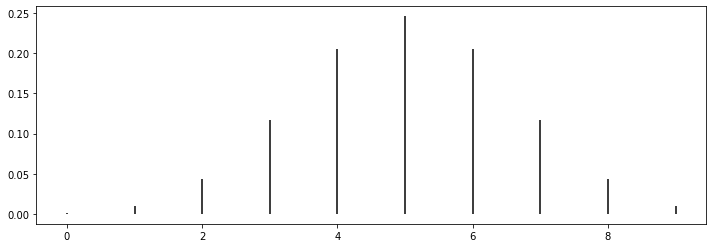

In [9]:
_, ax = plt.subplots(figsize=(12, 4))
ax.vlines(x, 0, q_pmf)

In [11]:
x = range(0, 10)
q = stats.binom(10, 0.25)
q_pmf = q.pmf(x)

stats.entropy(q_pmf)

1.7144085256537243

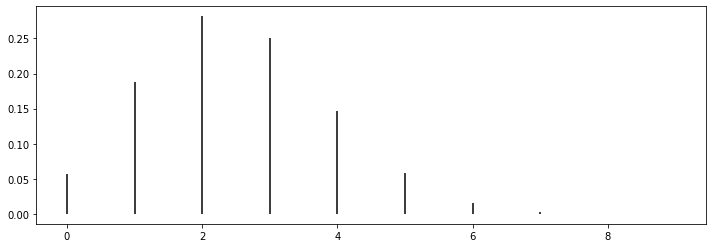

In [12]:
_, ax = plt.subplots(figsize=(12, 4))
ax.vlines(x, 0, q_pmf)

This answer intuitively makes sense, because of the lower bound of 0 on the overall distribution is less "spread out" with a binomial model where $p=.25$